In [1]:
import pandas as pd
import numpy as np
import pathlib

# viz
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import cross_validate, train_test_split
import lightgbm
import shap

/Users/carol/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
# df=pd.read_csv('/Users/tiger/Downloads/kc_house_data.csv')
df=pd.read_csv('kc_house_data.csv')

## data overview

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [5]:
print('observations and type')
df.info()

observations and type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-nul

In [6]:
print('missing values')
df.apply(lambda x: x.isna().sum()/len(x))

missing values


id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [7]:
print('unique values')
df.apply(lambda x: len(x.unique()))

unique values


id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

## correlation matrix

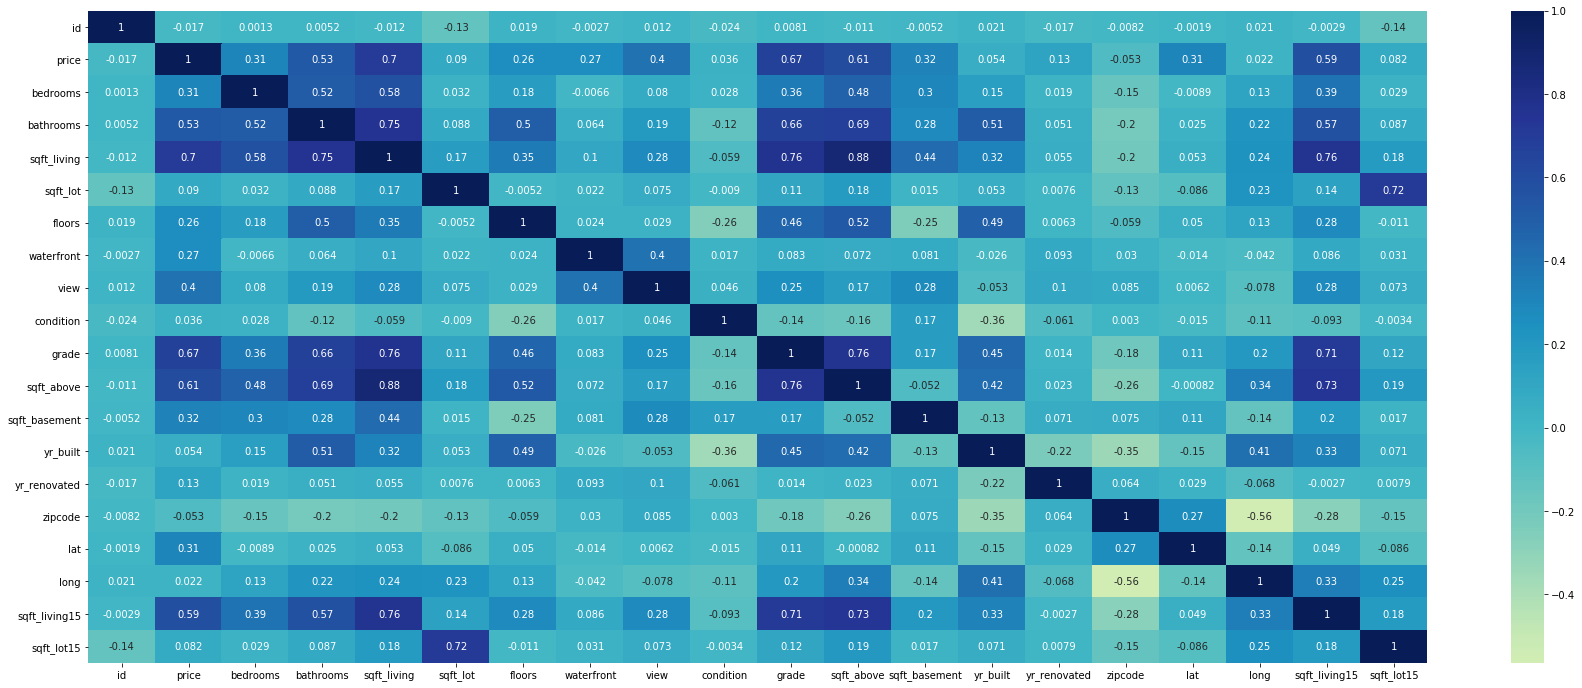

In [8]:
# import matplotlib.pyplot as mp, seaborn
corr = df.corr()
plt.figure(figsize=(30,12))
sns.heatmap(corr, center=0, annot=True, cmap='YlGnBu')

## stepwise regression

In [9]:
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [10]:
X=df.drop(['price'], axis=1)
y=df['price']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=52 )
data = pd.concat([X_train, y_train], axis=1)
model = forward_selected(data, 'price')

print(model.model.formula)
print(model.rsquared_adj)

price ~ sqft_living + lat + view + grade + yr_built + waterfront + bedrooms + bathrooms + zipcode + long + date + condition + sqft_above + sqft_living15 + sqft_lot15 + yr_renovated + floors + id + sqft_lot + sqft_basement + 1
0.6964006415932305


- Hence, we can conclude that when use all the variables to do regression we will have the largest adjusted R square.

In [11]:
X=df.drop(['price', 'date'], axis=1) # date is string
y=df['price']

In [12]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=52 )

### distribution of target variable

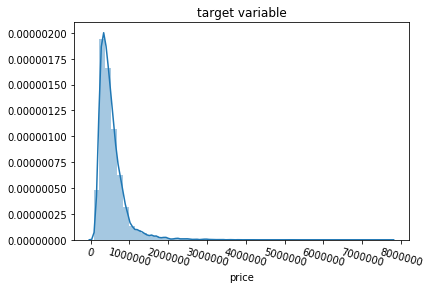

In [13]:
plt.xticks(rotation=-15) #set rotation degree of x-axis label
plt.title('target variable')
sns.distplot(y_train, label=np.linspace(0,y_train.max(),10))

### distribution of input variables

In [14]:
ls=X_train.drop(['waterfront', 'view','yr_renovated'], axis=1)
ls=ls.columns.values

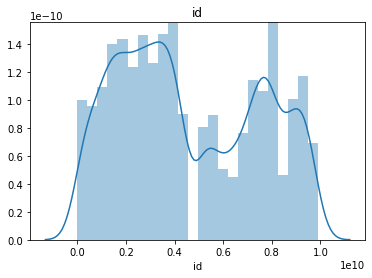

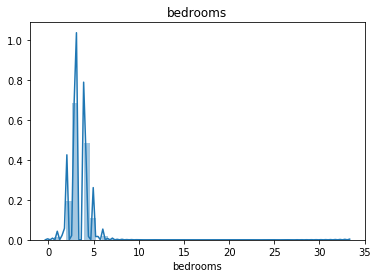

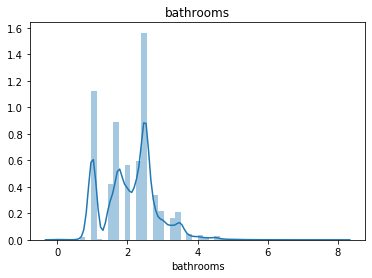

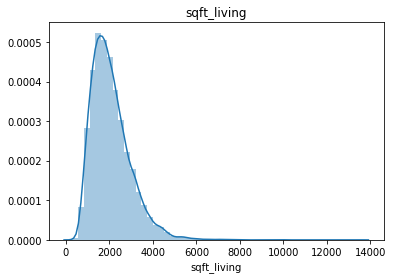

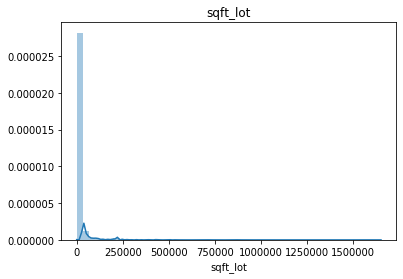

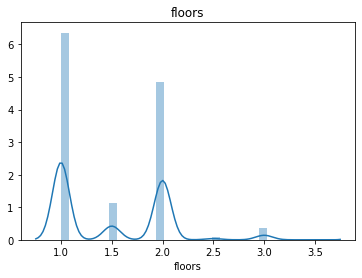

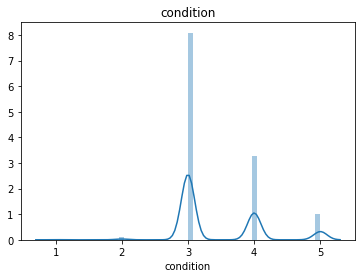

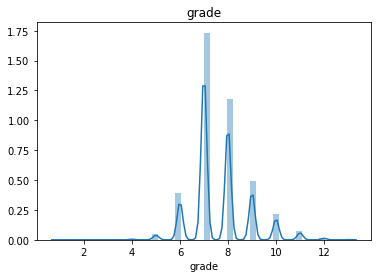

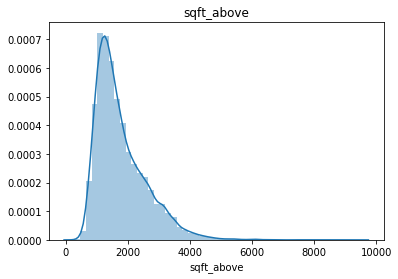

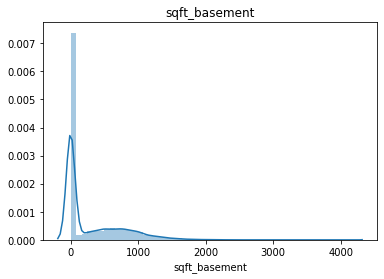

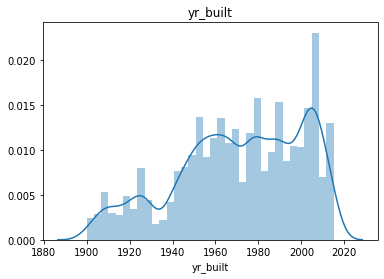

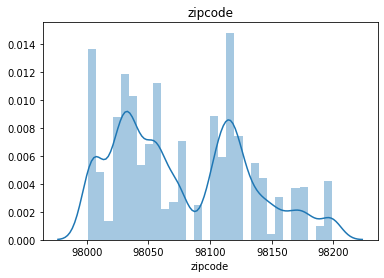

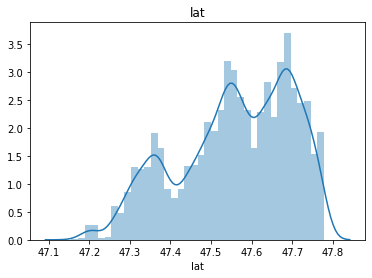

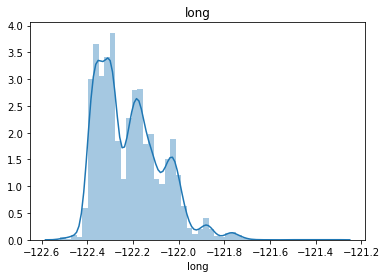

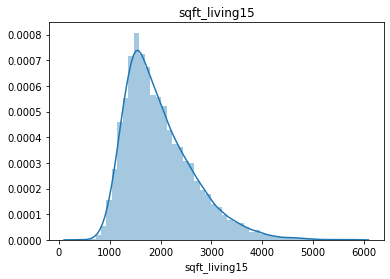

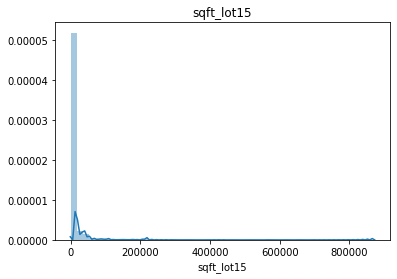

In [15]:
for icol in ls:
    plt.figure()
    sns.distplot(X_train[icol]).set_title(icol)

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open

<Figure size 432x288 with 0 Axes>

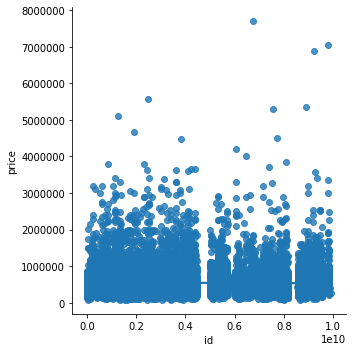

<Figure size 432x288 with 0 Axes>

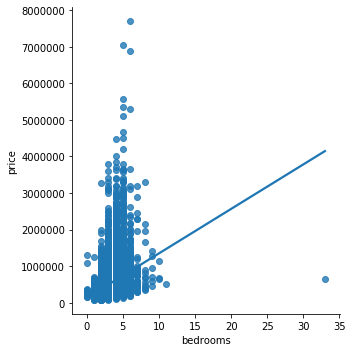

<Figure size 432x288 with 0 Axes>

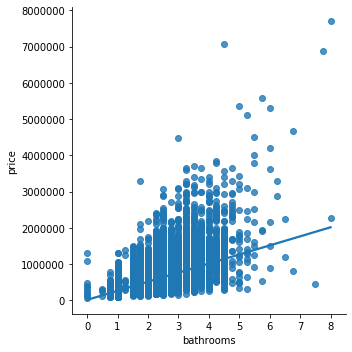

<Figure size 432x288 with 0 Axes>

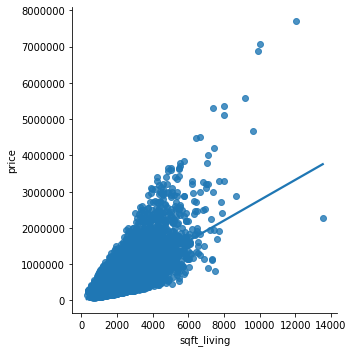

<Figure size 432x288 with 0 Axes>

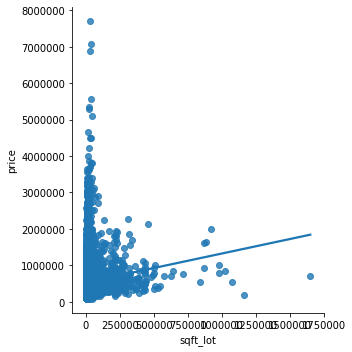

<Figure size 432x288 with 0 Axes>

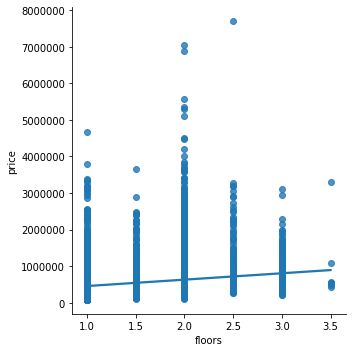

<Figure size 432x288 with 0 Axes>

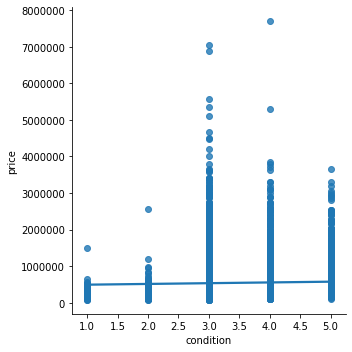

<Figure size 432x288 with 0 Axes>

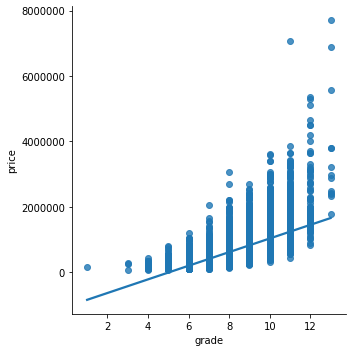

<Figure size 432x288 with 0 Axes>

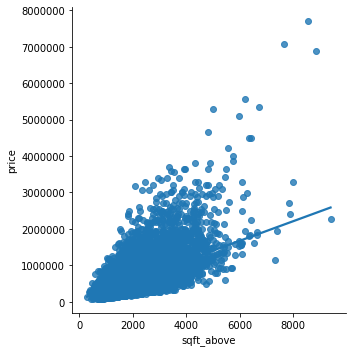

<Figure size 432x288 with 0 Axes>

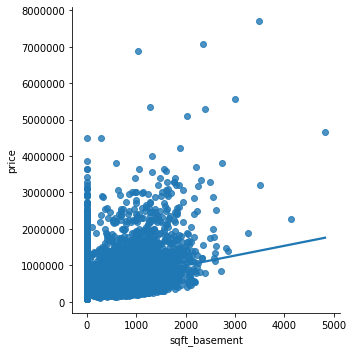

<Figure size 432x288 with 0 Axes>

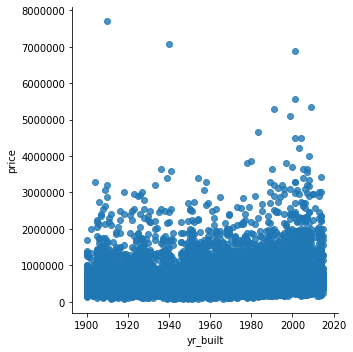

<Figure size 432x288 with 0 Axes>

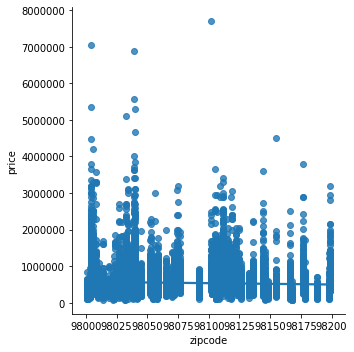

<Figure size 432x288 with 0 Axes>

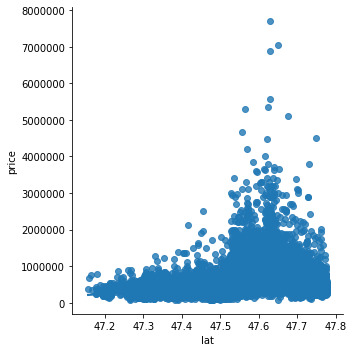

<Figure size 432x288 with 0 Axes>

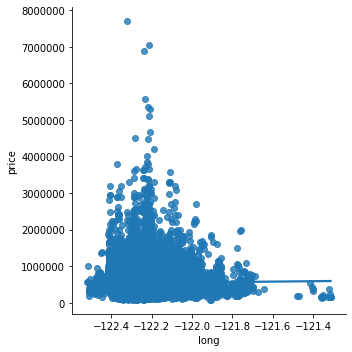

<Figure size 432x288 with 0 Axes>

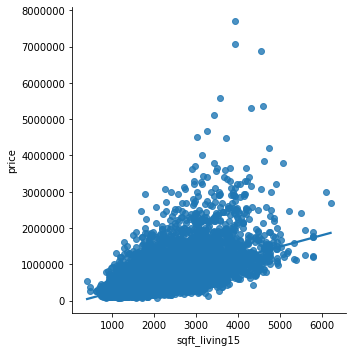

<Figure size 432x288 with 0 Axes>

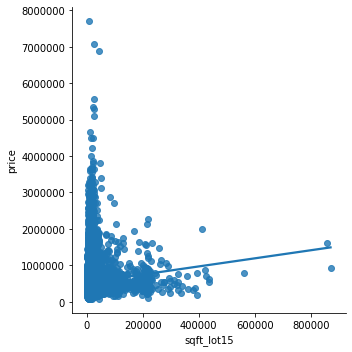

In [16]:
for icol in ls:
    plt.figure()
    sns.lmplot(x=icol, y=y.name, data=df, ci=None)

In [17]:
mod_ols = sm.OLS(y_train, sm.add_constant(X_train))
res_ols = mod_ols.fit()
print(res_ols.summary())
ols = res_ols.predict()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     2049.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        01:26:40   Log-Likelihood:            -2.2088e+05
No. Observations:               16209   AIC:                         4.418e+05
Df Residuals:                   16190   BIC:                         4.420e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.535e+06   3.36e+06      2.539

In [18]:
from sklearn.linear_model import LinearRegression

mod_skols = LinearRegression()
mod_skols.fit(X_train, y_train)
skols_pred = mod_skols.predict(X_train)

In [19]:
mod_lgbm = lightgbm.LGBMRegressor(max_depth=2,learning_rate=0.1,n_estimators=100,reg_alpha=1.0)
mod_lgbm.fit(X_train,y_train)
lgbm_pred = mod_lgbm.predict(X_train)

## model evaluation

### prediction errors: in-sample

In [20]:
# print('naive mean',mean_squared_error(y_train, np.ones((len(y_test),1))*y_train.mean()))
print('ols',mean_squared_error(y_train,  skols_pred))
print('gbm',mean_squared_error(y_train, lgbm_pred))

ols 40179398827.72199
gbm 19890078932.373653


### prediction errors: cross-validation

In [21]:
print('ols',-cross_validate(mod_skols, X_train, y_train, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'), cv=10)['test_neg_mean_squared_error'].mean())
print('gbm',-cross_validate(mod_lgbm, X_train, y_train, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'), cv=10)['test_neg_mean_squared_error'].mean())

ols 40467207388.93487
gbm 22751868471.48335


## model interpretation

Passing 16209 background samples may lead to slow runtimes. Consider using shap.sample(data, 100) to create a smaller background data set.
100%|===================| 16206/16209 [23:09<00:00]        

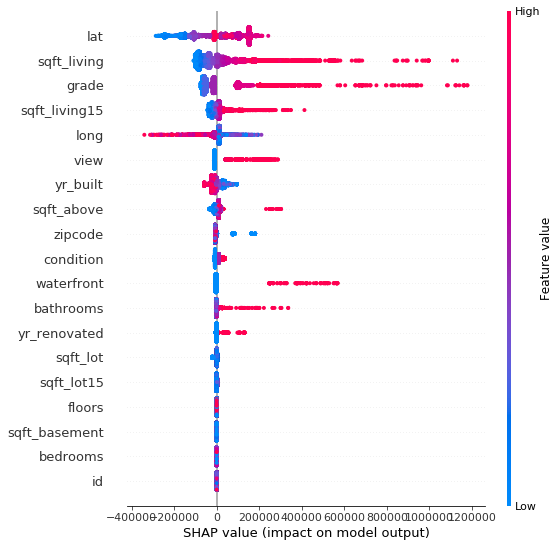

In [22]:
explainer = shap.TreeExplainer(mod_lgbm, X_train)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

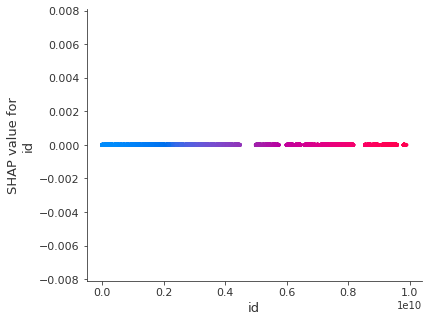

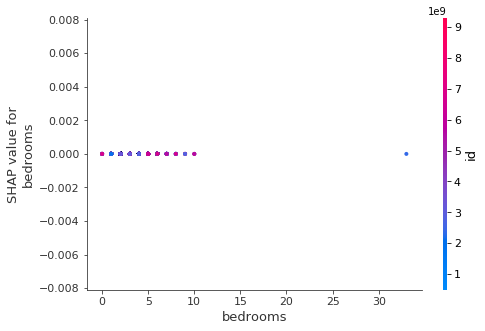

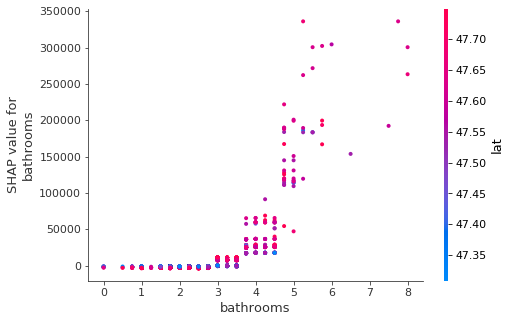

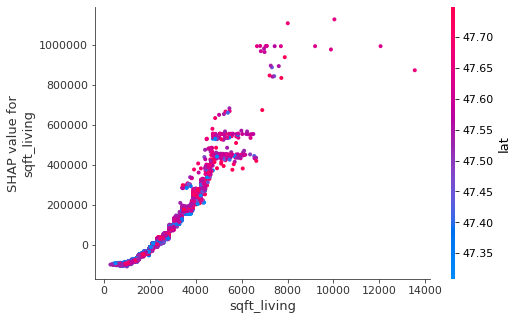

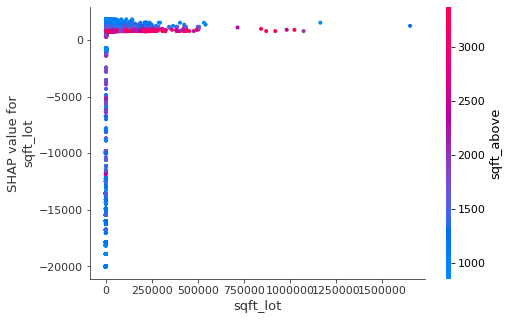

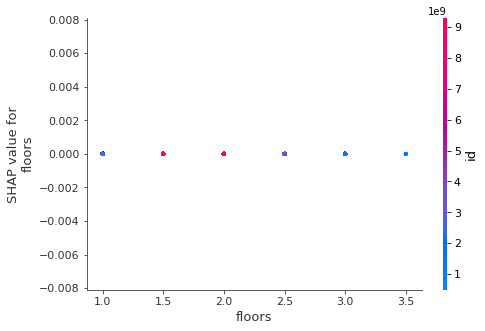

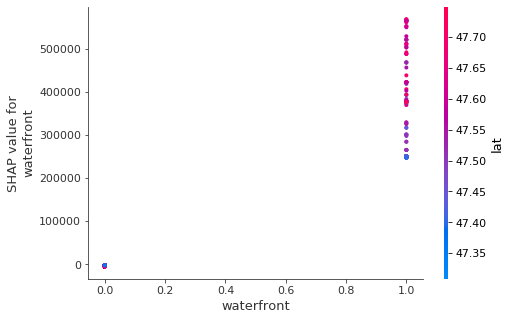

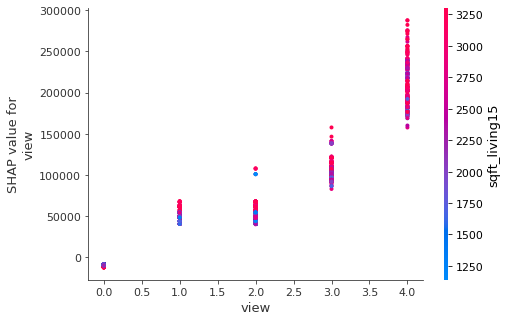

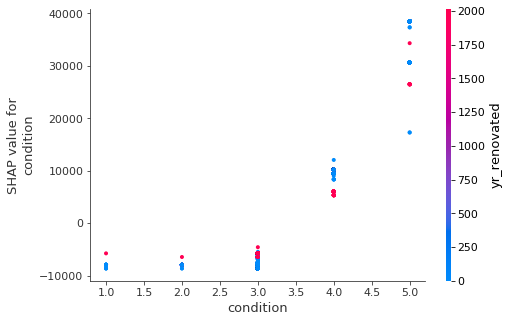

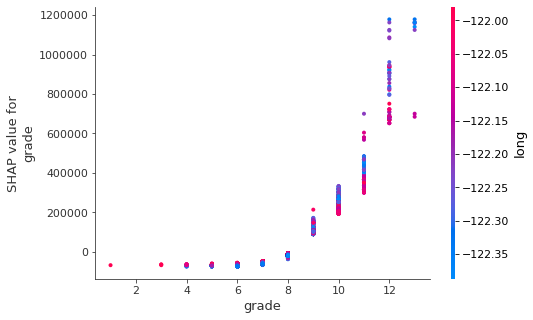

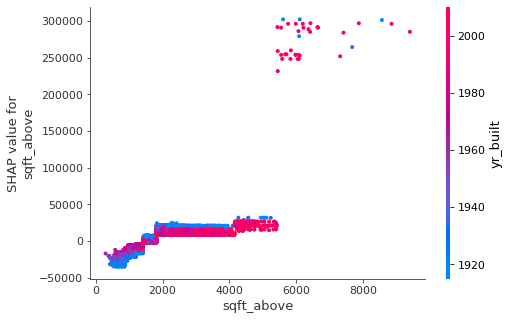

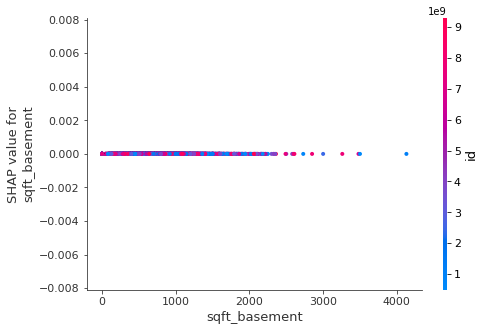

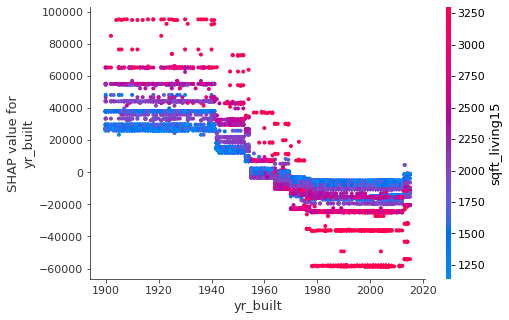

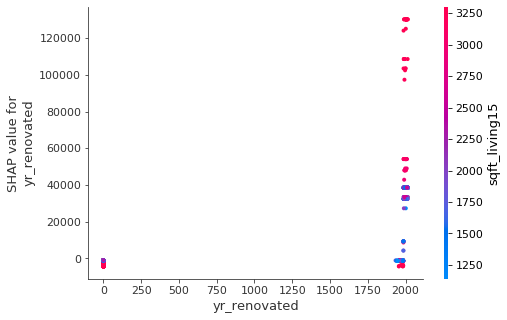

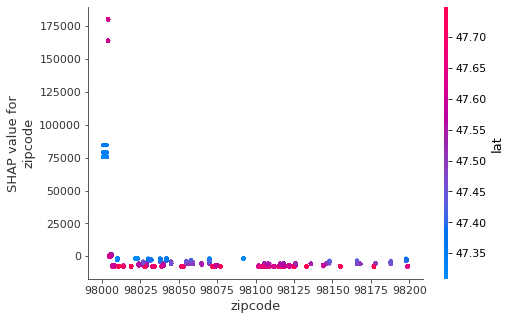

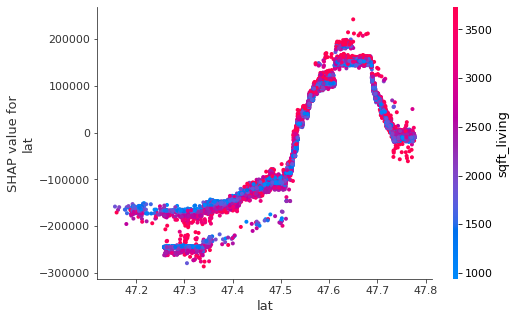

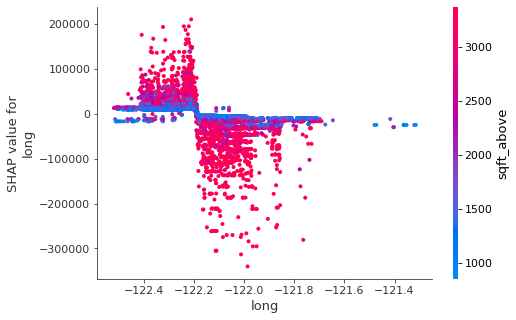

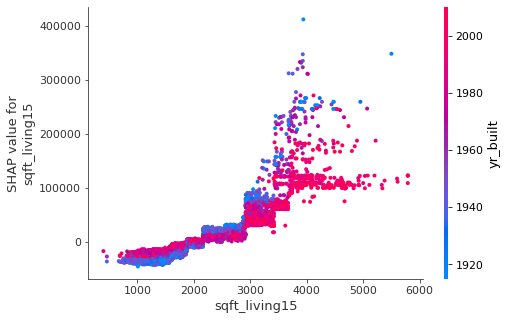

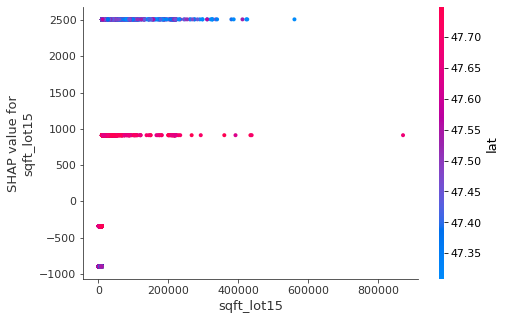

In [23]:
for col in X_train.columns:
    shap.dependence_plot(col, shap_values, X_train)#,interaction_index=None)

In [25]:
# plot_partial_dependence(mod_lgbm, X_train, range(X_train.shape[1])) 